In [3]:
from manim import *
config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -ql -s --progress_bar None --disable_caching Example"

Manim Community v0.17.2

# Previous theory
<iframe width="560" height="315" src="https://www.youtube.com/embed/tFxN5EoU58A" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/aVwxzDHniEw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/jvPPXbo87ds" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe> (optional)

# Colors

![colors](https://docs.manim.community/en/stable/_images/ColorsOverview-1.png)

### `SOMECOLOR_C === SOMECOLOR`

Reference: https://docs.manim.community/en/stable/reference/manim.utils.color.Colors.html?highlight=colors#manim.utils.color.Colors

In [ ]:
class Example(Scene):
  def construct(self):
    self.add(
      Square(fill_opacity=1)
        .set_color(RED) # RED_C === RED
        .scale(3)
    )

%manim $_RI

### Check out the color utilities that are defined in Manim:

https://docs.manim.community/en/stable/reference/manim.utils.color.html

### 💎 Install Color highlight VSCode plugin (by Sergii Naumov) 

In [ ]:
COLORS = [
  "#F00",
  "#FF0000",
  "#0F0",
  "#00F",
  "#FF0",
  "#0FF",
]

## VMobject attrs

All `VMobject` have the following attributes, where we can control the color and transparency of the path and the fill.

In [ ]:
class Example(Scene):
  def construct(self):
    self.add(
      Square(
        fill_opacity=0.3,   # 30 % opacity
        fill_color=TEAL,
        stroke_opacity=0.6, # 60 % opacity
        stroke_color=RED,
        stroke_width=10 # 10% of camera unit === 0.1 camera unit
      )
        .scale(3)
    )

%manim $_RI

## Main VMobjects: 
https://docs.manim.community/en/stable/reference/manim.mobject.geometry.html

## Setters:

* `vmob.set_color(COLOR)` method sets the `fill_color` and `stroke_color`.
* `vmob.set_stroke(width_color, stroke_width, stroke_opacity)`.
* `vmob.set_fill(fill_color, fill_opacity)`.
* `vmob.set_opacity(alpha)` method sets the `stroke_opacity` and `fill_opacity` (this works for **any** Mobject)
* `vmob.set_style(color, fill_color, fill_opacity, stroke_width, stroke_opacity)`.
* `vmob.match_style(other_vmob)` match all styles.

In [ ]:
class Example(Scene):
  def construct(self):
    self.add(
      Square().scale(3)
        # .set_color(RED)
        # .set_stroke(TEAL, 10, 0.5)
        # .set_fill(ORANGE, 0.1)
        # .set_opacity(0.5)
        # .set_style(
        #   fill_opacity=0.3,   
        #   fill_color=TEAL,
        #   stroke_opacity=0.6, 
        #   stroke_color=RED,
        #   stroke_width=10 
        # )
        # .match_style(Triangle(fill_opacity=1, fill_color=PINK))
    )

%manim $_RI

## Getters

* `vmob.get_color()` return `stroke_color`
* `vmob.get_fill_color()` 
* `vmob.get_fill_opacity()` 
* `vmob.get_stroke_color()`
* `vmob.get_stroke_width()` 
* `vmob.get_stroke_opacity()` 

## Define **VMobject** control points

```py
vmob = VMobject().set_points([
  start_1, first_handle_1, second_handle_1, end_1,
  start_2, first_handle_2, second_handle_2, end_2,
  start_3, first_handle_3, second_handle_3, end_3,
  # ...
])
```

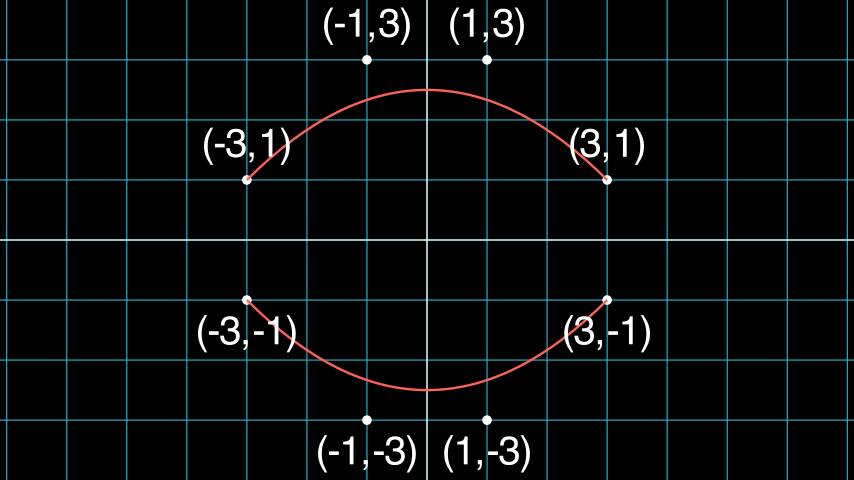

In [8]:
class Example(Scene):
  def construct(self):
    #             start, handle_1,handle_2,     end 
    coords = [ (-3,  1), (-1,  3), (1,  3), (3,  1),
               (-3, -1), (-1, -3), (1, -3), (3, -1)  ]
    dots = [ Dot([*coord,0]) for coord in coords ]
    xyz_coords = [ dot.get_center() for dot in dots ]
    coords_text = [
      Text(f"({x},{y})", font="Times")
        .next_to([x,y,0], np.sign(y)*UP)
      for x,y in coords
    ]

    vmob = VMobject(color=RED)\
      .set_points(xyz_coords)
    vmob_as_corners = VMobject(color=TEAL)\
      .set_points_as_corners(xyz_coords)
    vmob_smoothly = VMobject(color=PURPLE)\
      .set_points_smoothly(xyz_coords)

    self.add(
      NumberPlane(), *dots,
      vmob,
      # vmob_as_corners,
      # vmob_smoothly,
      *coords_text
    )

%manim $_RI

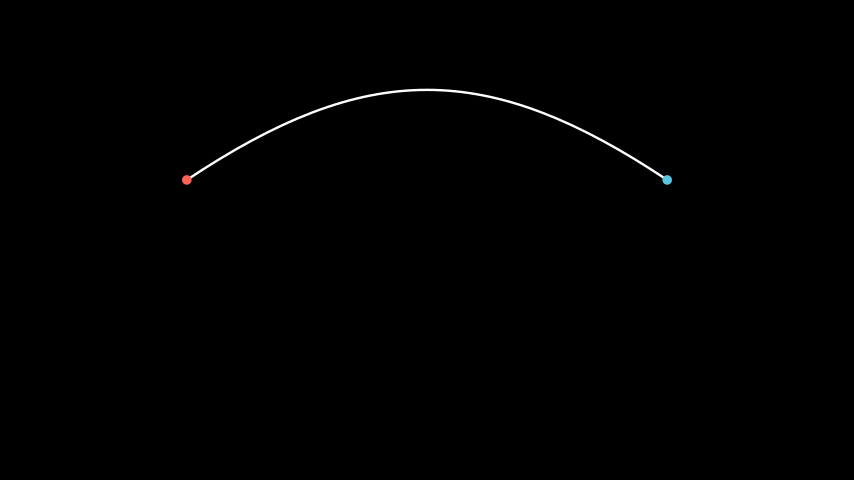

In [6]:
class Example(Scene):
  def construct(self):
    coords = [ (-4,  1), (-1,  3), (1,  3), (4,  1)  ]
    vmob = VMobject().set_points([
      (x,y,0) for x,y in coords
    ])

    start_dot = Dot(vmob.get_start(), color=RED)
    end_dot = Dot(vmob.get_end(), color=BLUE)

    self.add(vmob, start_dot, end_dot)

%manim $_RI

## Get control points from VMobjects

In [ ]:
class Example(Scene):
  def construct(self):
    vmob = Circle().scale(3.4)
    # vmob.points[0] += LEFT
    control_points = vmob.get_all_points()

    dots = [
      Dot(point) for point in control_points
    ]

    self.add(vmob, *dots)

%manim -v WARNING -s --progress_bar None --disable_caching Example